## ZCA + Logistic Regression Classifier

In [1]:
from init import *

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
import pandas as pd
import scipy

In [3]:
%matplotlib inline

#### Feature Processing

In [4]:
X = train_features.reshape(50000, 3*32*32)
Xt = test_features.reshape(10000, 3*32*32)
y = train_labels.flatten()
yt = test_labels.flatten()

### Grayscaling

In [7]:
def rgb2gray_array(rgb):

    r, g, b = rgb[:,0,:,:], rgb[:,1,:,:], rgb[:,2,:,:]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

train_features_gray = rgb2gray_array(train_features)
test_features_gray = rgb2gray_array(test_features)

In [8]:
train_features_gray.shape

(50000, 32, 32)

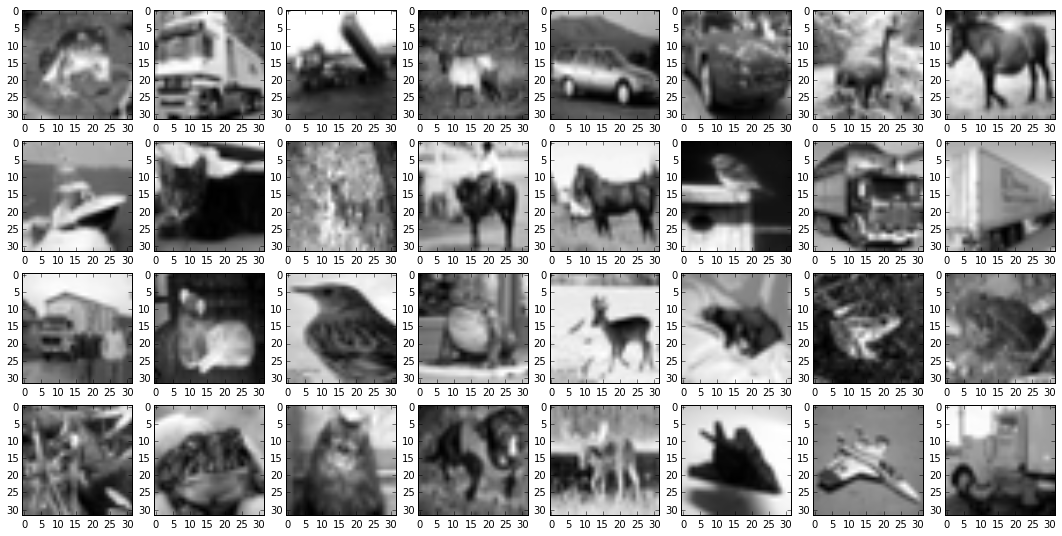

In [9]:
fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(train_features_gray[i], cmap='gray')

### Edge Detection
Andrew Ang. *Learning Feature Representations with K-Means*. 2012.
$$
\bar{x}^i = \frac{x^i-\text{mean}(x^i)}{\sqrt{\text{var}(x^i)+10}}
$$

In [47]:
def norm(img):
    avg = np.average(train_features, axis=0)
    std = np.std(train_features, axis=0)
    
    img_norm = (img - avg) / np.sqrt(std + 10)
    plt.imshow(img_norm.T, cmap='gray')

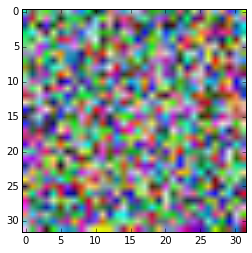

In [48]:
norm(train_features[0])

### ZCA

In [5]:
from zca import ZCA

In [8]:
zca = ZCA()
zca.fit(X)

ZCA(copy=False, regularization=1e-05)

In [9]:
X_zca = zca.transform(X)
Xt_zca = zca.transform(Xt)

### Manual ZCA

In [12]:
def zca_whitening(inputs):
    sigma = np.dot(inputs, inputs.T)/inputs.shape[1] #Correlation matrix
    U,S,V = np.linalg.svd(sigma) #Singular Value Decomposition
    epsilon = 0.1                #Whitening constant, it prevents division by zero
    ZCAMatrix = np.dot(np.dot(U, np.diag(1.0/np.sqrt(np.diag(S) + epsilon))), U.T)                     #ZCA Whitening matrix
    return np.dot(ZCAMatrix, inputs)   #Data whitening

In [ ]:
X_zca_manual = zca_whitening(X)

In [ ]:
X_zca_manual

In [ ]:
fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(X_zca_manual[i].reshape(3, 32,32).T)

#### Visualed ZCA-ed Images

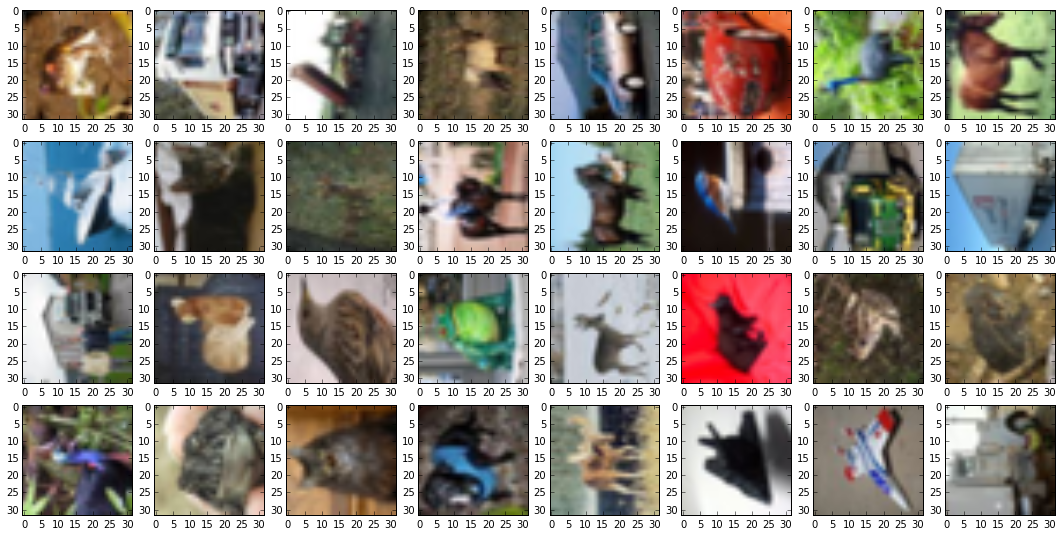

In [11]:
fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(train_features[i].T)

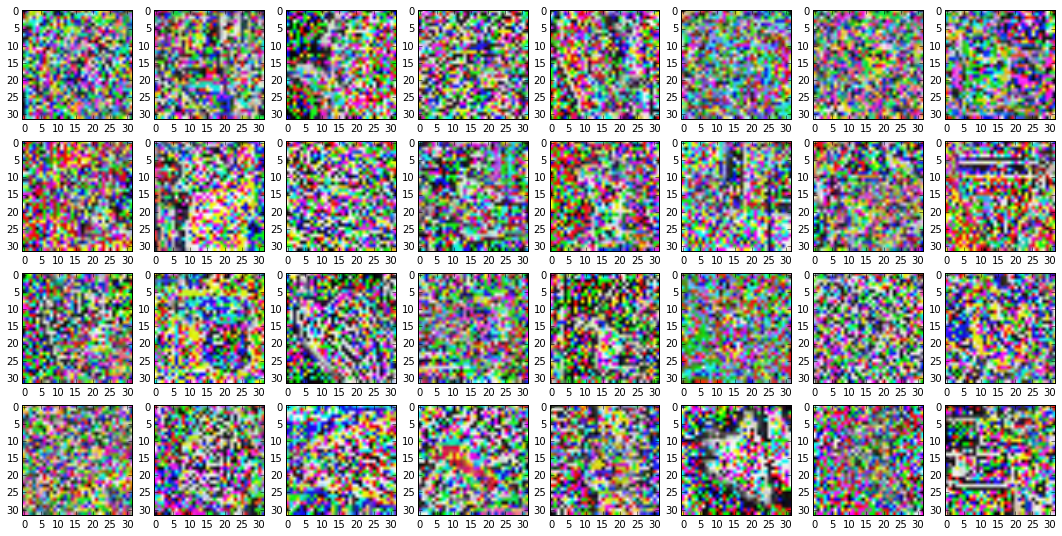

In [20]:
fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(X_zca[i].reshape(3,32,32).T)

### Classification

In [9]:
linreg = LogisticRegression(verbose=True, n_jobs=-1)
linreg.fit(X_zca, y)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=True, warm_start=False)

In [10]:
X_pred = linreg.predict(X_zca)
metrics.accuracy_score(y, X_pred)

0.53313999999999995

In [11]:
Xt_pred = linreg.predict(Xt_zca)
metrics.accuracy_score(yt, Xt_pred)

0.34989999999999999

### Different ZCA on Testing Dataset

In [12]:
zca_t = ZCA()
zca_t.fit(Xt)
Xt_zca = zca_t.transform(Xt)

In [13]:
linreg = LogisticRegression(verbose=True, n_jobs=-1)
linreg.fit(X_zca, y)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=True, warm_start=False)

In [14]:
X_pred = linreg.predict(X_zca)
metrics.accuracy_score(y, X_pred)

0.53313999999999995

In [15]:
Xt_pred = linreg.predict(Xt_zca)
metrics.accuracy_score(yt, Xt_pred)

0.3453